In [1]:
import wandb
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pandas as pd

In [3]:
TEXT_WIDTH_INCHES = 6.30045
COL_WIDTH_INCHES = 3.03209

In [4]:
wandb_api = wandb.Api()

In [5]:
WANDB_ENTITY = "giulio-uva"
WANDB_PROJECT = "claficle"
WANDB_PREFIX = f"{WANDB_ENTITY}/{WANDB_PROJECT}"

In [6]:
runs = wandb_api.runs(WANDB_PREFIX)

In [7]:
gpt_wechsel_runs = [
    run
    for run in runs
    if run.job_type == "train"# and run.config["base_checkpoint"] is None
]

In [8]:
ppl_data = {
    run.config["model"]["target_lang"]: pd.DataFrame(
        run.scan_history(keys=["clm/val/perplexity", "trainer/global_step"])
    )
    for run in gpt_wechsel_runs
}

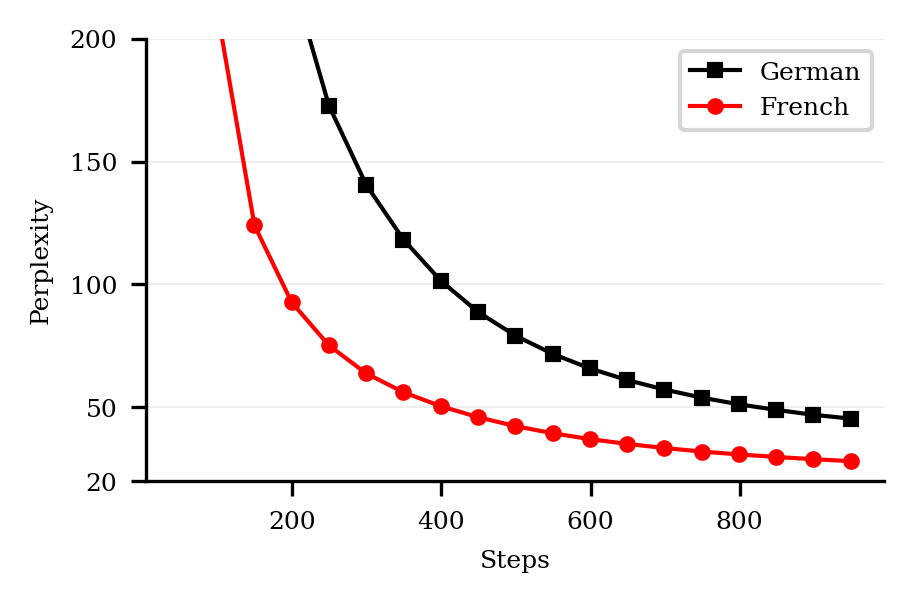

In [9]:
font = {"family": "serif", "size": 6}

matplotlib.rc("font", **font)

f, ax = plt.subplots(1, 1, figsize=(COL_WIDTH_INCHES, COL_WIDTH_INCHES * 0.66), dpi=300)

lng_to_lang = {"fr": "French", "de": "German"}
lng_to_marker = {"fr": "o", "de": "s"}
lng_to_color = {"fr": "red", "de": "black"}

for lang, data in ppl_data.items():
    ax.plot(
        data["trainer/global_step"],
        data["clm/val/perplexity"],
        label=lng_to_lang[lang],
        markersize=3,
        linewidth=1,
        marker=lng_to_marker[lang],
        c=lng_to_color[lang]
    )
ax.grid(axis="y", linewidth=0.1)
ax.set_yticks([20, 50, 100, 150, 200])
ax.set_ylim(20, 200)
ax.set_ylabel("Perplexity")
ax.set_xlabel("Steps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
f.set_tight_layout(True)
plt.savefig("../reports/figures/gpt2-w_ppl.pdf", bbox_inches="tight", pad_inches=0)
plt.show()